In [10]:
library(tidyverse)
library(alakazam)
library(shazam)
library(ggplot2)
library(magrittr)
library(ggpubr)
library(stats)
library(stringr)
library(ggrepel)
library(data.table)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [8]:
hc_tcr <- read.csv('../../../tcr_vdj/publication/input/HC_tcr.csv')
untreated_tcr <- read.csv('../../../tcr_vdj/publication/input/untreated_tcr.csv')
treated_tcr <- read.csv('../../../tcr_vdj/publication/input/treated_tcr.csv')

In [12]:
all_tcr <- rbindlist(list(hc_tcr,untreated_tcr,treated_tcr))

In [13]:
 gene_usage_all <- countGenes(all_tcr, gene="v_gene", groups="sample", mode="gene")

In [30]:
gene_usage_all %<>% left_join(meta, by = c('sample' = 'orig.ident')) %>% arrange(gene)

In [31]:
gene_usage_all %>% head()

sample,gene,seq_count,seq_freq,X,group
<chr>,<chr>,<int>,<dbl>,<int>,<chr>
WYF,TRAV1-1,267,0.021155217,11185,SLE
WYF2,TRAV1-1,157,0.019573619,12638,SLE
GZR,TRAV1-1,128,0.007773122,809,SLE
MXY,TRAV1-1,113,0.015295073,9928,SLE
XYY2,TRAV1-1,104,0.005617674,16111,SLE
GW,TRAV1-1,91,0.008694821,1,SLE


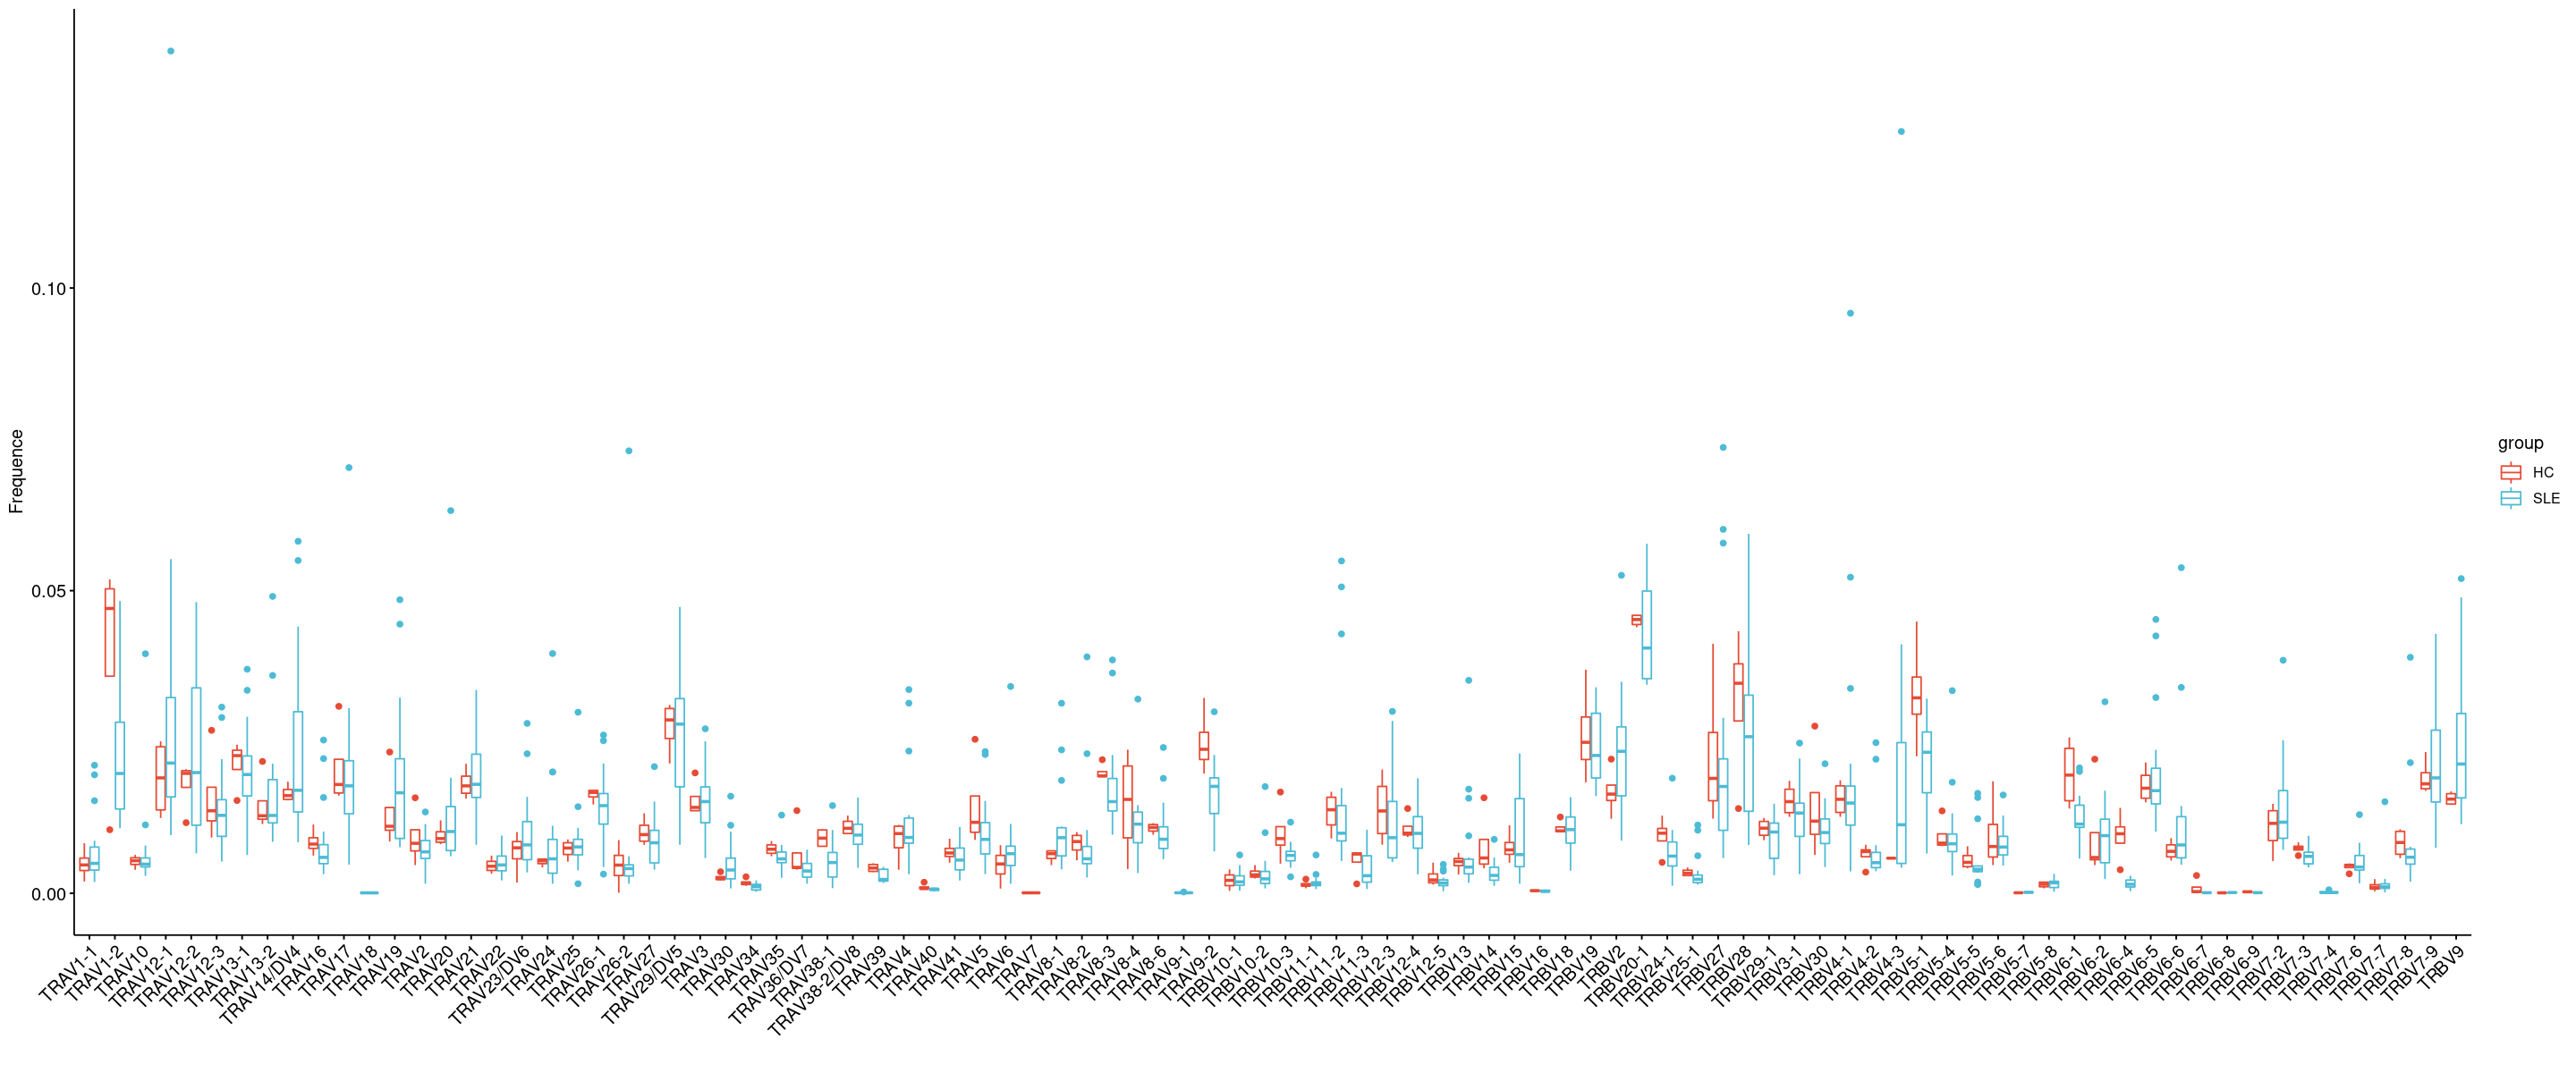

In [32]:
options(repr.plot.width=24, repr.plot.height=10)
ggboxplot(gene_usage_all, "gene", "seq_freq", color = "group",palette = 'npg', legend = 'right') +  theme(axis.text.x=element_text(angle=45, hjust=1)) + xlab('') + ylab('Frequence')

In [41]:
# gene_usage_all %>% head()
filter_gene = gene_usage_all %>% group_by(gene) %>% summarise(count = sum(seq_freq)) %>% filter(count >0.01)  %>% select('gene') 
filter_gene$gene

[1] "TRAV1-1"      "TRAV1-2"      "TRAV10"       "TRAV12-1"     "TRAV12-2"    
 [6] "TRAV12-3"     "TRAV13-1"     "TRAV13-2"     "TRAV14/DV4"   "TRAV16"      
[11] "TRAV17"       "TRAV19"       "TRAV2"        "TRAV20"       "TRAV21"      
[16] "TRAV22"       "TRAV23/DV6"   "TRAV24"       "TRAV25"       "TRAV26-1"    
[21] "TRAV26-2"     "TRAV27"       "TRAV29/DV5"   "TRAV3"        "TRAV30"      
[26] "TRAV34"       "TRAV35"       "TRAV36/DV7"   "TRAV38-1"     "TRAV38-2/DV8"
[31] "TRAV39"       "TRAV4"        "TRAV40"       "TRAV41"       "TRAV5"       
[36] "TRAV6"        "TRAV8-1"      "TRAV8-2"      "TRAV8-3"      "TRAV8-4"     
[41] "TRAV8-6"      "TRAV9-2"      "TRBV10-1"     "TRBV10-2"     "TRBV10-3"    
[46] "TRBV11-1"     "TRBV11-2"     "TRBV11-3"     "TRBV12-3"     "TRBV12-4"    
[51] "TRBV12-5"     "TRBV13"       "TRBV14"       "TRBV15"       "TRBV18"      
[56] "TRBV19"       "TRBV2"        "TRBV20-1"     "TRBV24-1"     "TRBV25-1"    
[61] "TRBV27"       "TRBV28"       "TRBV29-1"     "TRBV3-1"      "TRBV30"      
[66] "TRBV4-1"      "TRBV4-2"      "TRBV4-3"      "TRBV5-1"      "TRBV5-4"     
[71] "TRBV5-5"      "TRBV5-6"      "TRBV5-8"      "TRBV6-1"      "TRBV6-2"     
[76] "TRBV6-4"      "TRBV6-5"      "TRBV6-6"      "TRBV7-2"      "TRBV7-3"     
[81] "TRBV7-6"      "TRBV7-7"      "TRBV7-8"      "TRBV7-9"      "TRBV9"

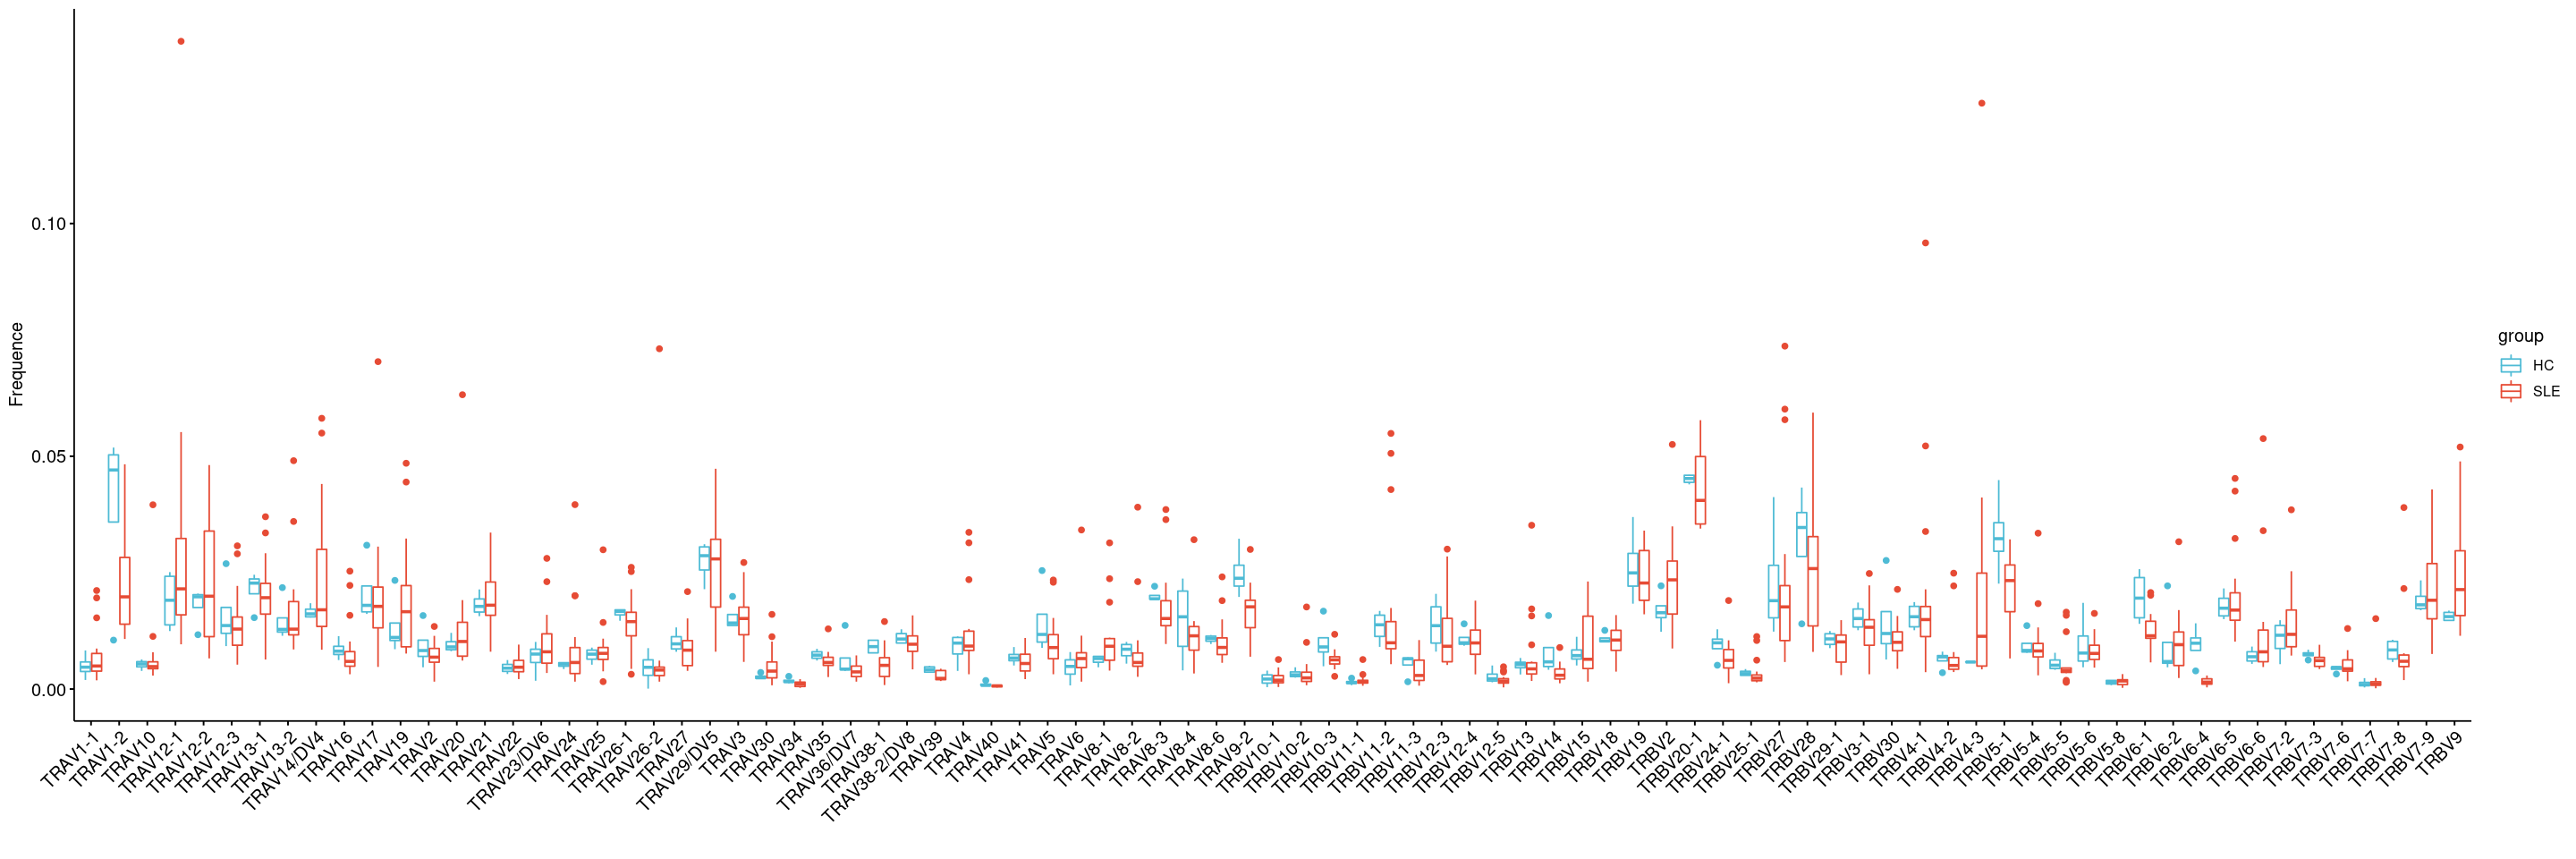

In [44]:
options(repr.plot.width=24, repr.plot.height=8)
ggboxplot(gene_usage_all[ gene_usage_all$gene %in% filter_gene$gene ,], "gene", "seq_freq", color = "group",palette = c('#4EBBD5','#E64B35'), legend = 'right') +  theme(axis.text.x=element_text(angle=45, hjust=1)) + xlab('') + ylab('Frequence')